In [93]:
import pandas as pd
from matplotlib import dates as mpl_dates 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta 
from jinja2 import Environment, FileSystemLoader
read = pd.read_csv('yyj.txt', delimiter='|', encoding='utf8', header=None, names=["day", "time", "user", "message"])
df = read.loc[:read[(read["user"] == "super_stream_server") & (read["message"] == "Scene switched to  Outro" )].any(1).idxmax()]
df


,day,time,user,message
0,2022-03-09,08:17:39,dainty_angela,D
1,2022-03-09,08:17:39,chriscage_,WEIRD
2,2022-03-09,08:17:39,aussiewelsh,etownjYASS etownjYASS etownjYASS
3,2022-03-09,08:17:39,chimdude97,where is yuggie??
4,2022-03-09,08:17:39,moryttz,yyjHey
...,...,...,...,...
54751,2022-03-09,12:18:32,garruku,MOCKS 󠀀
54752,2022-03-09,12:18:32,parkjaegxp,byeeeee
54753,2022-03-09,12:18:32,lloyds128,bye
54754,2022-03-09,12:18:32,zay_ih,Bye Bye yyjHey yyjHey yyjHey yyjL yyjHey yyjHe...


In [94]:
countemptyvalues = df.isnull().sum()['message']
countemptyvalues


60

In [95]:
emptyvalues = df[pd.isnull(df).any(axis=1)]
emptyvalues

,day,time,user,message
203,2022-03-09,08:18:39,shbash159 subscribed at Tier 1. They've subscr...,NaN
517,2022-03-09,08:21:17,ennymiaka subscribed at Tier 1. They've subscr...,NaN
822,2022-03-09,08:24:08,ireBreathUT subscribed at Tier 1. They've subs...,NaN
1399,2022-03-09,08:27:44,asori19 subscribed at Tier 1. They've subscrib...,NaN
1630,2022-03-09,08:28:52,ouseff93 subscribed at Tier 1. They've subscri...,NaN
2060,2022-03-09,08:31:14,eppe1800 subscribed with Prime. They've subscr...,NaN
3614,2022-03-09,08:36:58,ransganz subscribed at Tier 1. They've subscri...,NaN
3891,2022-03-09,08:38:15,lackthunder67 subscribed with Prime. They've s...,NaN
4728,2022-03-09,08:43:27,vampen_32 subscribed at Tier 1. They've subscr...,NaN
5937,2022-03-09,08:47:26,happymochix subscribed at Tier 1. They've subs...,NaN


In [96]:
subscribed_at_Tier_1 = emptyvalues[emptyvalues.user.str.contains("subscribed at Tier 1")]
Total_tier1 = subscribed_at_Tier_1['user'].count()
subscribed_at_Tier_2 = emptyvalues[emptyvalues.user.str.contains("subscribed at Tier 2")]
Total_tier2 = subscribed_at_Tier_2['user'].count()
subscribed_at_Tier_3 = emptyvalues[emptyvalues.user.str.contains("subscribed at Tier 3")]
Total_tier3 = subscribed_at_Tier_3['user'].count()
subscribed_with_prime = emptyvalues[emptyvalues.user.str.contains("subscribed with Prime")]
Total_prime = subscribed_with_prime['user'].count()
gifted_subs = emptyvalues[emptyvalues.user.str.contains("gifted")]
Total_gifted = gifted_subs['user'].count()
timed_out_for = emptyvalues[emptyvalues.user.str.contains("timed out for")]
Total_time_out = timed_out_for['user'].count()
banned_from_this_channel  = emptyvalues[emptyvalues.user.str.contains("been permanently banned")]
Total_bans = banned_from_this_channel['user'].count()


In [97]:
d = {'Description': ["Subscribed at Tier 1", "Subscribed at Tier 2", "Subscribed at Tier 3", "Subscribed with Prime", "Gifted", "Timed Outs", "banned"], 'Total': [Total_tier1, Total_tier2, Total_tier3, Total_prime, Total_gifted, Total_time_out, Total_bans]}
moreData = pd.DataFrame(data=d)
moreData

,Description,Total
0,Subscribed at Tier 1,20
1,Subscribed at Tier 2,0
2,Subscribed at Tier 3,1
3,Subscribed with Prime,13
4,Gifted,5
5,Timed Outs,18
6,banned,2


In [98]:
Searching_by_User = df[(df["user"] == "has been timed out for") & (df["user"] )].reset_index()
drop_index_from_Searching_by_User = Searching_by_User.drop(['index'], axis=1)
drop_index_from_Searching_by_User

,day,time,user,message


In [99]:
today = datetime.today()
d2 = today.strftime("%B %d, %Y")
timestr = today.strftime("%Y-%m-%d")
print(d2)

March 10, 2022


In [100]:
df.to_csv("../march/"+timestr+".csv")

In [101]:
Searching_by_User = df[(df["message"] == "zoodasaGood") & (df["user"] )].reset_index()
drop_index_from_Searching_by_User = Searching_by_User.drop(['index'], axis=1)
drop_index_from_Searching_by_User

,day,time,user,message


In [102]:
Searching_by_User_and_msg = df[(df["user"] == "super_stream_server") & (df["message"] == "Scene switched to: Outro" )].reset_index()
drop_index_from_Searching_by_User_and_msg = Searching_by_User_and_msg.drop(['index'], axis=1)
drop_index_from_Searching_by_User_and_msg


,day,time,user,message


Searching By User

In [103]:
Searching_by_User = df[(df["user"] == "dimeax00") & (df["message"] )].reset_index()
drop_index_from_Searching_by_User = Searching_by_User.drop(['index'], axis=1)
drop_index_from_Searching_by_User


,day,time,user,message
0,2022-03-09,08:18:11,dimeax00,WeirdChamping
1,2022-03-09,08:26:05,dimeax00,yyjTasty
2,2022-03-09,08:26:43,dimeax00,KEKW
3,2022-03-09,08:26:51,dimeax00,S OMEGALUL Y
4,2022-03-09,08:27:13,dimeax00,KEKL
...,...,...,...,...
102,2022-03-09,11:55:48,dimeax00,suck it out yyjTasty
103,2022-03-09,11:58:06,dimeax00,KEKWiggle
104,2022-03-09,12:14:31,dimeax00,peepoShortOnAGoose
105,2022-03-09,12:14:45,dimeax00,YEPCock


In [104]:
drop_index_from_Searching_by_User.to_csv("searchingbyuser.txt")

In [105]:
pd.Series(' '.join(drop_index_from_Searching_by_User['message']).split()).value_counts()[:20].reset_index()

,index,0
0,PepeLaugh,9
1,KEKW,8
2,KEKL,8
3,OMEGALUL,7
4,KEKInsane,7
5,YEP,6
6,FeelsDankMan,5
7,PogU,4
8,PogO,3
9,🤝,3


Other way for searching by user

In [106]:
#printing especific values from one chosen column
df.loc[df['user'] == "chrisCage_"]

,day,time,user,message


Searching By User and Message

-----------------------------------------------------------------------------------------------------

MOST USED WORDS 

In [107]:
withOutNA = df.dropna()
most_used_words = pd.Series(' '.join(withOutNA['message']).split()).value_counts()[:70].reset_index()
clean1 = most_used_words.replace('󠀀', np.nan, regex=True)
text_withoutNan = clean1.dropna(axis='rows')
text_withoutNan

#define values
values = ["The", "the", 'it', 'be', 'is', 'you', 'a', 'to', 'no', 'in', 'that', 'she', 'this', 'for', 
          'not', 'good', 'I', 'on', 'and', 'i', '1', '2', 'Lmao', 'Lol', "You", 'like', 'just', 'its', '?', 'lol', 'all', 'so', 'will',
          'of', 'are', 'they', 'bye', '⠀', 'yes', 'he', 'can', '11', 'go', 'him', 'your', 'back', 'her', 'D', 'u', 'do', 'take', 'need', 'more', 'why', 'have', 'what', 'with', 'dont']

#drop rows that contain any value in the list
textwithoutmostusedwords = text_withoutNan[text_withoutNan['index'].isin(values) == False]

#another way to search for most used words 
#df.message.value_counts().reset_index()

#--------------------------------------------------Saving in a document----------------------------------------------------------------
savetextwithoutmostusedwords = textwithoutmostusedwords.to_csv("topemotes.txt", sep=' ', header=False, index=False)
#--------------------------------------------------------------------------------------------------------------------------------------

Cleanreadytop20chatters = pd.read_csv("topemotes.txt", delimiter=' ', encoding='utf8', header=None, names=["Emote", "Times Used"])
Cleanreadytop20chatters

,Emote,Times Used
0,KEKW,2863
1,seoaPls,2064
2,peepoShortOnAGoose,1423
3,LUL,1373
4,KEKInsane,1254
5,catJAM,1189
6,PepeLaugh,1122
7,YEP,1085
8,yyjHey,1065
9,xar2EDM,1035


In [108]:
withOutNA[withOutNA.message.str.contains("cheer300")]

,day,time,user,message


TOP CHATTERS


In [109]:
print("top chatters of", d2)
#total messages
topChatters = df.user.value_counts().reset_index()
totalChatters = int(topChatters['user'].sum())
print("Messages logged today =", totalChatters)
plot_index_Totalmsg = str('Total Messages ') +  str(totalChatters)
#total 20 chatters
top20Chatters = df.user.value_counts()[:20].reset_index()
totalTop20Chatters = int(top20Chatters['user'].sum())
print("Sum of total 20 messages =",totalTop20Chatters)
percentageTop20Chatter = round(((totalTop20Chatters / totalChatters) * 100) , 2)
print("Perentage of Top 20 chatters =", percentageTop20Chatter)
plot_index_top20 = str('Percentage of Top 20 ') +  str(percentageTop20Chatter) + str("%")
#total 5 chatters
top5Chatters = df.user.value_counts()[:5].reset_index()
totalTop5Chatters = int(top5Chatters['user'].sum())
print("Sum of total 5 messages =",totalTop5Chatters)
percentageTop5Chatter = round(((totalTop5Chatters / totalChatters) * 100) , 2)
print("Perentage of Top 5 chatters =", percentageTop5Chatter)
plot_index_top5 = str('Percentage of Top 5 ') +  str(percentageTop5Chatter) + str("%")

top chatters of March 10, 2022
Messages logged today = 54756
Sum of total 20 messages = 14568
Perentage of Top 20 chatters = 26.61
Sum of total 5 messages = 6418
Perentage of Top 5 chatters = 11.72


In [110]:
#name 1
nametop_1 = top20Chatters.loc[0, 'index']
Searching_by_User_top_1 = df[(df["user"] == nametop_1) & (df["message"] )]
Searching_by_UserTop_1_emote = pd.Series(' '.join(Searching_by_User_top_1['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser1 = Searching_by_UserTop_1_emote[Searching_by_UserTop_1_emote['index'].isin(values) == False].reset_index()
topemotefromtop1chatter = textwithoutmostusedwords_byuser1.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top1chatter = textwithoutmostusedwords_byuser1.loc[0,0]
topemotefromtop_1chatter_second_emote = textwithoutmostusedwords_byuser1.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_1chatter_second_emote = textwithoutmostusedwords_byuser1.loc[1,0]
#name 2
nametop_2 = top20Chatters.loc[1, 'index']
Searching_by_User_top_2 = df[(df["user"] == nametop_2) & (df["message"] )]
Searching_by_UserTop_2_emote = pd.Series(' '.join(Searching_by_User_top_2['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser2 = Searching_by_UserTop_2_emote[Searching_by_UserTop_2_emote['index'].isin(values) == False].reset_index()
topemotefromtop2chatter = textwithoutmostusedwords_byuser2.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top2chatter = textwithoutmostusedwords_byuser2.loc[0,0]
topemotefromtop_2chatter_second_emote = textwithoutmostusedwords_byuser2.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_2chatter_second_emote = textwithoutmostusedwords_byuser2.loc[1,0]
#name 3
nametop_3 = top20Chatters.loc[2, 'index']
Searching_by_User_top_3 = df[(df["user"] == nametop_3) & (df["message"] )]
Searching_by_UserTop_3_emote = pd.Series(' '.join(Searching_by_User_top_3['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser3 = Searching_by_UserTop_3_emote[Searching_by_UserTop_3_emote['index'].isin(values) == False].reset_index()
topemotefromtop3chatter = textwithoutmostusedwords_byuser3.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top3chatter = textwithoutmostusedwords_byuser3.loc[0,0]
topemotefromtop_3chatter_second_emote = textwithoutmostusedwords_byuser3.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_3chatter_second_emote = textwithoutmostusedwords_byuser3.loc[1,0]
#name 4
nametop_4 = top20Chatters.loc[3, 'index']
Searching_by_User_top_4 = df[(df["user"] == nametop_4) & (df["message"] )]
Searching_by_UserTop_4_emote = pd.Series(' '.join(Searching_by_User_top_4['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser4 = Searching_by_UserTop_4_emote[Searching_by_UserTop_4_emote['index'].isin(values) == False].reset_index()
topemotefromtop4chatter = textwithoutmostusedwords_byuser4.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top4chatter = textwithoutmostusedwords_byuser4.loc[0,0]
topemotefromtop_4chatter_second_emote = textwithoutmostusedwords_byuser4.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_4chatter_second_emote = textwithoutmostusedwords_byuser4.loc[1,0]
#name 5
nametop_5 = top20Chatters.loc[4, 'index']
Searching_by_User_top_5 = df[(df["user"] == nametop_5) & (df["message"] )]
Searching_by_UserTop_5_emote = pd.Series(' '.join(Searching_by_User_top_5['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser5 = Searching_by_UserTop_5_emote[Searching_by_UserTop_5_emote['index'].isin(values) == False].reset_index()
topemotefromtop5chatter = textwithoutmostusedwords_byuser5.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top5chatter = textwithoutmostusedwords_byuser5.loc[0,0]
topemotefromtop_5chatter_second_emote = textwithoutmostusedwords_byuser5.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_5chatter_second_emote = textwithoutmostusedwords_byuser5.loc[1,0]
#name 6
nametop_6 = top20Chatters.loc[5, 'index']
Searching_by_User_top_6 = df[(df["user"] == nametop_6) & (df["message"] )]
Searching_by_UserTop_6_emote = pd.Series(' '.join(Searching_by_User_top_6['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser6 = Searching_by_UserTop_6_emote[Searching_by_UserTop_6_emote['index'].isin(values) == False].reset_index()
topemotefromtop6chatter = textwithoutmostusedwords_byuser6.loc[0,'index']
howManyTimesWasUsedThe_topemotefrom_top6chatter = textwithoutmostusedwords_byuser6.loc[0,0]
topemotefromtop_6chatter_second_emote = textwithoutmostusedwords_byuser6.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_6chatter_second_emote = textwithoutmostusedwords_byuser6.loc[1,0]
#name 7
nametop_7 = top20Chatters.loc[6, 'index']
Searching_by_User_top_7 = df[(df["user"] == nametop_7) & (df["message"] )]
Searching_by_UserTop_7_emote = pd.Series(' '.join(Searching_by_User_top_7['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser7 = Searching_by_UserTop_7_emote[Searching_by_UserTop_7_emote['index'].isin(values) == False].reset_index()
topemotefromtop7chatter = textwithoutmostusedwords_byuser7.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top7chatter = textwithoutmostusedwords_byuser7.loc[0,0]
topemotefromtop_7chatter_second_emote = textwithoutmostusedwords_byuser7.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_7chatter_second_emote = textwithoutmostusedwords_byuser7.loc[1,0]
#name 8
nametop_8 = top20Chatters.loc[7, 'index']
Searching_by_User_top_8 = df[(df["user"] == nametop_8) & (df["message"] )]
Searching_by_UserTop_8_emote = pd.Series(' '.join(Searching_by_User_top_8['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser8 = Searching_by_UserTop_8_emote[Searching_by_UserTop_8_emote['index'].isin(values) == False].reset_index()
topemotefromtop8chatter = textwithoutmostusedwords_byuser8.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top8chatter = textwithoutmostusedwords_byuser8.loc[0,0]
topemotefromtop_8chatter_second_emote = textwithoutmostusedwords_byuser8.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_8chatter_second_emote = textwithoutmostusedwords_byuser8.loc[1,0]
#name 9
nametop_9 = top20Chatters.loc[8, 'index']
Searching_by_User_top_9 = df[(df["user"] == nametop_9) & (df["message"] )]
Searching_by_UserTop_9_emote = pd.Series(' '.join(Searching_by_User_top_9['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser9 = Searching_by_UserTop_9_emote[Searching_by_UserTop_9_emote['index'].isin(values) == False].reset_index()
topemotefromtop9chatter = textwithoutmostusedwords_byuser9.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top9chatter = textwithoutmostusedwords_byuser9.loc[0,0]
topemotefromtop_9chatter_second_emote = textwithoutmostusedwords_byuser9.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_9chatter_second_emote = textwithoutmostusedwords_byuser9.loc[1,0]
#name 10
nametop_10 = top20Chatters.loc[9, 'index']
Searching_by_User_top_10 = df[(df["user"] == nametop_10) & (df["message"] )]
Searching_by_UserTop_10_emote = pd.Series(' '.join(Searching_by_User_top_10['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser10 = Searching_by_UserTop_10_emote[Searching_by_UserTop_10_emote['index'].isin(values) == False].reset_index()
topemotefromtop10chatter = textwithoutmostusedwords_byuser10.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top10chatter = textwithoutmostusedwords_byuser10.loc[0,0]
topemotefromtop_10chatter_second_emote = textwithoutmostusedwords_byuser10.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_10chatter_second_emote = textwithoutmostusedwords_byuser10.loc[1,0]
#name 11
nametop_11 = top20Chatters.loc[10, 'index']
Searching_by_User_top_11 = df[(df["user"] == nametop_11) & (df["message"] )]
Searching_by_UserTop_11_emote = pd.Series(' '.join(Searching_by_User_top_11['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser11 = Searching_by_UserTop_11_emote[Searching_by_UserTop_11_emote['index'].isin(values) == False].reset_index()
topemotefromtop11chatter = textwithoutmostusedwords_byuser11.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top11chatter = textwithoutmostusedwords_byuser11.loc[0,0]
topemotefromtop_11chatter_second_emote = textwithoutmostusedwords_byuser11.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_11chatter_second_emote = textwithoutmostusedwords_byuser11.loc[1,0]
#name 12
nametop_12 = top20Chatters.loc[11, 'index']
Searching_by_User_top_12 = df[(df["user"] == nametop_12) & (df["message"] )]
Searching_by_UserTop_12_emote = pd.Series(' '.join(Searching_by_User_top_12['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser12 = Searching_by_UserTop_12_emote[Searching_by_UserTop_12_emote['index'].isin(values) == False].reset_index()
topemotefromtop12chatter = textwithoutmostusedwords_byuser12.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top12chatter = textwithoutmostusedwords_byuser12.loc[0,0]
topemotefromtop_12chatter_second_emote = textwithoutmostusedwords_byuser12.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_12chatter_second_emote = textwithoutmostusedwords_byuser12.loc[1,0]
#name 13
nametop_13 = top20Chatters.loc[12, 'index']
Searching_by_User_top_13 = df[(df["user"] == nametop_13) & (df["message"] )]
Searching_by_UserTop_13_emote = pd.Series(' '.join(Searching_by_User_top_13['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser13 = Searching_by_UserTop_13_emote[Searching_by_UserTop_13_emote['index'].isin(values) == False].reset_index()
topemotefromtop13chatter = textwithoutmostusedwords_byuser13.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top13chatter = textwithoutmostusedwords_byuser13.loc[0,0]
topemotefromtop_13chatter_second_emote = textwithoutmostusedwords_byuser13.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_13chatter_second_emote = textwithoutmostusedwords_byuser13.loc[1,0]
#name 14
nametop_14 = top20Chatters.loc[13, 'index']
Searching_by_User_top_14 = df[(df["user"] == nametop_14) & (df["message"] )]
Searching_by_UserTop_14_emote = pd.Series(' '.join(Searching_by_User_top_14['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser14 = Searching_by_UserTop_14_emote[Searching_by_UserTop_14_emote['index'].isin(values) == False].reset_index()
topemotefromtop14chatter = textwithoutmostusedwords_byuser14.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top14chatter = textwithoutmostusedwords_byuser14.loc[0,0]
topemotefromtop_14chatter_second_emote = textwithoutmostusedwords_byuser14.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_14chatter_second_emote = textwithoutmostusedwords_byuser14.loc[1,0]
#name 15
nametop_15 = top20Chatters.loc[14, 'index']
Searching_by_User_top_15 = df[(df["user"] == nametop_15) & (df["message"] )]
Searching_by_UserTop_15_emote = pd.Series(' '.join(Searching_by_User_top_15['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser15 = Searching_by_UserTop_15_emote[Searching_by_UserTop_15_emote['index'].isin(values) == False].reset_index()
topemotefromtop15chatter = textwithoutmostusedwords_byuser15.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top15chatter = textwithoutmostusedwords_byuser15.loc[0,0]
topemotefromtop_15chatter_second_emote = textwithoutmostusedwords_byuser15.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_15chatter_second_emote = textwithoutmostusedwords_byuser15.loc[1,0]
#name 16
nametop_16 = top20Chatters.loc[15, 'index']
Searching_by_User_top_16 = df[(df["user"] == nametop_16) & (df["message"] )]
Searching_by_UserTop_16_emote = pd.Series(' '.join(Searching_by_User_top_16['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser16 = Searching_by_UserTop_16_emote[Searching_by_UserTop_16_emote['index'].isin(values) == False].reset_index()
topemotefromtop16chatter = textwithoutmostusedwords_byuser16.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top16chatter = textwithoutmostusedwords_byuser16.loc[0,0]
topemotefromtop_16chatter_second_emote = textwithoutmostusedwords_byuser16.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_16chatter_second_emote = textwithoutmostusedwords_byuser16.loc[1,0]
#name 17
nametop_17 = top20Chatters.loc[16, 'index']
Searching_by_User_top_17 = df[(df["user"] == nametop_17) & (df["message"] )]
Searching_by_UserTop_17_emote = pd.Series(' '.join(Searching_by_User_top_17['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser17 = Searching_by_UserTop_17_emote[Searching_by_UserTop_17_emote['index'].isin(values) == False].reset_index()
topemotefromtop17chatter = textwithoutmostusedwords_byuser17.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top17chatter = textwithoutmostusedwords_byuser17.loc[0,0]
topemotefromtop_17chatter_second_emote = textwithoutmostusedwords_byuser17.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_17chatter_second_emote = textwithoutmostusedwords_byuser17.loc[1,0]
#name 18
nametop_18 = top20Chatters.loc[17, 'index']
Searching_by_User_top_18 = df[(df["user"] == nametop_18) & (df["message"] )]
Searching_by_UserTop_18_emote = pd.Series(' '.join(Searching_by_User_top_18['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser18 = Searching_by_UserTop_18_emote[Searching_by_UserTop_18_emote['index'].isin(values) == False].reset_index()
topemotefromtop18chatter = textwithoutmostusedwords_byuser18.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top18chatter = textwithoutmostusedwords_byuser18.loc[0,0]
topemotefromtop_18chatter_second_emote = textwithoutmostusedwords_byuser18.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_18chatter_second_emote = textwithoutmostusedwords_byuser18.loc[1,0]
#name 19
nametop_19 = top20Chatters.loc[18, 'index']
Searching_by_User_top_19 = df[(df["user"] == nametop_19) & (df["message"] )]
Searching_by_UserTop_19_emote = pd.Series(' '.join(Searching_by_User_top_19['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser19 = Searching_by_UserTop_19_emote[Searching_by_UserTop_19_emote['index'].isin(values) == False].reset_index()
topemotefromtop19chatter = textwithoutmostusedwords_byuser19.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top19chatter = textwithoutmostusedwords_byuser19.loc[0,0]
topemotefromtop_19chatter_second_emote = textwithoutmostusedwords_byuser19.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_19chatter_second_emote = textwithoutmostusedwords_byuser19.loc[1,0]
#name 20
nametop_20 = top20Chatters.loc[19, 'index']
Searching_by_User_top_20 = df[(df["user"] == nametop_20) & (df["message"] )]
Searching_by_UserTop_20_emote = pd.Series(' '.join(Searching_by_User_top_20['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser20 = Searching_by_UserTop_20_emote[Searching_by_UserTop_20_emote['index'].isin(values) == False].reset_index()
topemotefromtop20chatter = textwithoutmostusedwords_byuser20.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top20chatter = textwithoutmostusedwords_byuser20.loc[0,0]
topemotefromtop_20chatter_second_emote = textwithoutmostusedwords_byuser20.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top_20chatter_second_emote = textwithoutmostusedwords_byuser20.loc[1,0]

In [111]:
print("top chatters of", d2)
#total messages
topChatters = df.user.value_counts().reset_index()
totalChatters = int(topChatters['user'].sum())
print("Messages logged today =", totalChatters)
plot_index_Totalmsg = str('Total Messages ') +  str(totalChatters)
#total 20 chatters
top20Chatters = df.user.value_counts()[:20].reset_index()
totalTop20Chatters = int(top20Chatters['user'].sum())
print("Sum of total 20 messages =",totalTop20Chatters)
percentageTop20Chatter = round(((totalTop20Chatters / totalChatters) * 100) , 2)
print("Perentage of Top 20 chatters =", percentageTop20Chatter)
plot_index_top20 = str('Percentage of Top 20 ') +  str(percentageTop20Chatter)
#total 5 chatters
top5Chatters = df.user.value_counts()[:5].reset_index()
totalTop5Chatters = int(top5Chatters['user'].sum())
print("Sum of total 5 messages =",totalTop5Chatters)
percentageTop5Chatter = round(((totalTop5Chatters / totalChatters) * 100) , 2)
print("Perentage of Top 5 chatters =", percentageTop5Chatter)
plot_index_top5 = str('Percentage of Top 5 ') +  str(percentageTop5Chatter) 

top20Chatters['Most used emote by user'] = pd.Series([topemotefromtop1chatter,topemotefromtop2chatter,topemotefromtop3chatter,topemotefromtop4chatter,topemotefromtop5chatter,
                                                      topemotefromtop6chatter,topemotefromtop7chatter,topemotefromtop8chatter,topemotefromtop9chatter,topemotefromtop10chatter,
                                                      topemotefromtop11chatter,topemotefromtop12chatter,topemotefromtop13chatter,topemotefromtop14chatter,topemotefromtop15chatter,
                                                      topemotefromtop16chatter,topemotefromtop17chatter,topemotefromtop18chatter,topemotefromtop19chatter,topemotefromtop20chatter])

top20Chatters['Times used'] = pd.Series([howManyTimesWasUsedThe_topemotefrom_top1chatter,howManyTimesWasUsedThe_topemotefrom_top2chatter,howManyTimesWasUsedThe_topemotefrom_top3chatter,
                                                      howManyTimesWasUsedThe_topemotefrom_top4chatter,howManyTimesWasUsedThe_topemotefrom_top5chatter,howManyTimesWasUsedThe_topemotefrom_top6chatter,
                                                      howManyTimesWasUsedThe_topemotefrom_top7chatter,howManyTimesWasUsedThe_topemotefrom_top8chatter,howManyTimesWasUsedThe_topemotefrom_top9chatter,
                                                      howManyTimesWasUsedThe_topemotefrom_top10chatter,howManyTimesWasUsedThe_topemotefrom_top11chatter,howManyTimesWasUsedThe_topemotefrom_top12chatter,
                                                      howManyTimesWasUsedThe_topemotefrom_top13chatter,howManyTimesWasUsedThe_topemotefrom_top14chatter,howManyTimesWasUsedThe_topemotefrom_top15chatter,
                                                      howManyTimesWasUsedThe_topemotefrom_top16chatter,howManyTimesWasUsedThe_topemotefrom_top17chatter,howManyTimesWasUsedThe_topemotefrom_top18chatter,
                                                      howManyTimesWasUsedThe_topemotefrom_top19chatter,howManyTimesWasUsedThe_topemotefrom_top20chatter])

top20Chatters['Second most used emote by user'] = pd.Series([topemotefromtop_1chatter_second_emote,topemotefromtop_2chatter_second_emote,topemotefromtop_3chatter_second_emote,topemotefromtop_4chatter_second_emote,
                                                             topemotefromtop_5chatter_second_emote,topemotefromtop_6chatter_second_emote,topemotefromtop_7chatter_second_emote,topemotefromtop_8chatter_second_emote,
                                                             topemotefromtop_9chatter_second_emote,topemotefromtop_10chatter_second_emote,topemotefromtop_11chatter_second_emote,topemotefromtop_12chatter_second_emote,
                                                             topemotefromtop_13chatter_second_emote,topemotefromtop_14chatter_second_emote,topemotefromtop_15chatter_second_emote,topemotefromtop_16chatter_second_emote,
                                                             topemotefromtop_17chatter_second_emote,topemotefromtop_18chatter_second_emote,topemotefromtop_19chatter_second_emote,topemotefromtop_20chatter_second_emote])

top20Chatters['Total for second emote'] = pd.Series([howManyTimesWasUsedThe_topemotefrom_top_1chatter_second_emote, howManyTimesWasUsedThe_topemotefrom_top_2chatter_second_emote, 
                                                             howManyTimesWasUsedThe_topemotefrom_top_3chatter_second_emote,howManyTimesWasUsedThe_topemotefrom_top_4chatter_second_emote,
                                                             howManyTimesWasUsedThe_topemotefrom_top_5chatter_second_emote,howManyTimesWasUsedThe_topemotefrom_top_6chatter_second_emote,
                                                             howManyTimesWasUsedThe_topemotefrom_top_7chatter_second_emote,howManyTimesWasUsedThe_topemotefrom_top_8chatter_second_emote,
                                                             howManyTimesWasUsedThe_topemotefrom_top_9chatter_second_emote,howManyTimesWasUsedThe_topemotefrom_top_10chatter_second_emote,
                                                             howManyTimesWasUsedThe_topemotefrom_top_11chatter_second_emote,howManyTimesWasUsedThe_topemotefrom_top_12chatter_second_emote,
                                                             howManyTimesWasUsedThe_topemotefrom_top_13chatter_second_emote,howManyTimesWasUsedThe_topemotefrom_top_14chatter_second_emote,
                                                             howManyTimesWasUsedThe_topemotefrom_top_15chatter_second_emote,howManyTimesWasUsedThe_topemotefrom_top_16chatter_second_emote,
                                                             howManyTimesWasUsedThe_topemotefrom_top_17chatter_second_emote,howManyTimesWasUsedThe_topemotefrom_top_18chatter_second_emote,
                                                             howManyTimesWasUsedThe_topemotefrom_top_19chatter_second_emote,howManyTimesWasUsedThe_topemotefrom_top_20chatter_second_emote])
top20Chatters.to_csv('top20Chatters.csv', header=False, index=False,)


top chatters of March 10, 2022
Messages logged today = 54756
Sum of total 20 messages = 14568
Perentage of Top 20 chatters = 26.61
Sum of total 5 messages = 6418
Perentage of Top 5 chatters = 11.72


In [112]:
readytop20chatters = pd.read_csv('top20Chatters.csv', encoding='utf8', header=None, names=["User", "Total", "Most used emote", "Times used", "Second most used emote", "Times used 2"])
readytop20chatters['Top'] = pd.Series(["1", "2", "3", "4", "5", "6","7","8","9","10","11","12","13","14","15", "16", "17", "18", "19", "20"])
readytop20chatters = readytop20chatters[['Top', "User", "Total", "Most used emote", "Times used", "Second most used emote", "Times used 2"]]


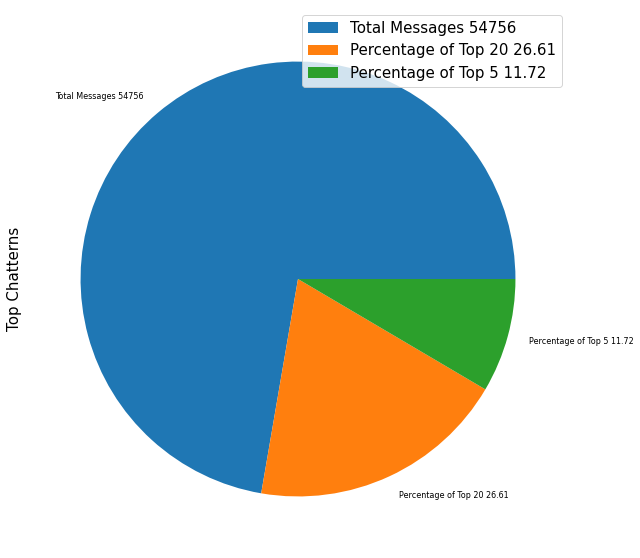

In [113]:
plt.rcParams['font.size'] = 15
top_chatters_frame = pd.DataFrame({'Top Chatterns' : [totalChatters, totalTop20Chatters, totalTop5Chatters]}, index=[plot_index_Totalmsg, plot_index_top20, plot_index_top5])
top_chatters_frame
plot = top_chatters_frame.plot.pie(y='Top Chatterns', figsize=(10, 10), fontsize=8)
plt.savefig('plot')

In [114]:

# 2. Create a template Environment
env = Environment(loader=FileSystemLoader('templates'))

# 3. Load the template from the Environment
template = env.get_template('report_template.html')
# 4. Render the template with variables
html = template.render(page_title_text='My_report',
                       title_text='Jinnytty Stream report',
                       Day=d2,
                       top20Chatters_text='Top 20 Chatters',
                       totalChatters=totalChatters,
                       totalTop20Chatters=totalTop20Chatters,
                       percentageTop20Chatter=percentageTop20Chatter,
                       totalTop5Chatters=totalTop5Chatters,
                       percentageTop5Chatter=percentageTop5Chatter,
                       readytop20chatters=readytop20chatters,
                       MostUsedEmote_text='Most used Emote',
                       Cleanreadytop20chatters=Cleanreadytop20chatters,
                       totalChatters_text= totalChatters,
                       totalTop20Chatters_text=totalTop20Chatters,
                       percentageTop20Chatter_text=percentageTop20Chatter,
                       totalTop5Chatters_text=totalTop5Chatters,
                       percentageTop5Chatter_text=percentageTop5Chatter,
                       topchatterspie_text='Top Chatters Pie',
                       moredatatitle="More Data",
                       moreData=moreData
)

# 5. Write the template to an HTML file
with open('html_report_jinja.html', 'w', encoding="utf-8") as f:
    f.write(html)